## H1: Importance sampling theory 

In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def sample_scaled_cauchy(n, gamma=1.0):
    u = np.random.uniform(low=0.0, high=1.0, size=n)
    return gamma * np.tan(np.pi * (u - 0.5))

def pdf_scaled_cauchy(x, gamma=1.0):
    return gamma / (np.pi * (gamma**2 + x**2))

In [ ]:
def importance_sampling(n, gamma=1.0):
    # Draw samples from scaled Cauchy distribution
    xs = sample_scaled_cauchy(n, gamma)
    # Compute density functions of unnormalized target and proposal
    w = np.exp(-0.5 * xs**2) / pdf_scaled_cauchy(xs, gamma)
    return w

N = 5000
Z_hat = np.zeros(N) # for storing estimates of normalizing constant
gamma = np.sqrt(0.5)#np.exp(-2)

for n in range(N):
    weights = importance_sampling(n+1, gamma)
    Z_hat[n] = np.mean(weights)

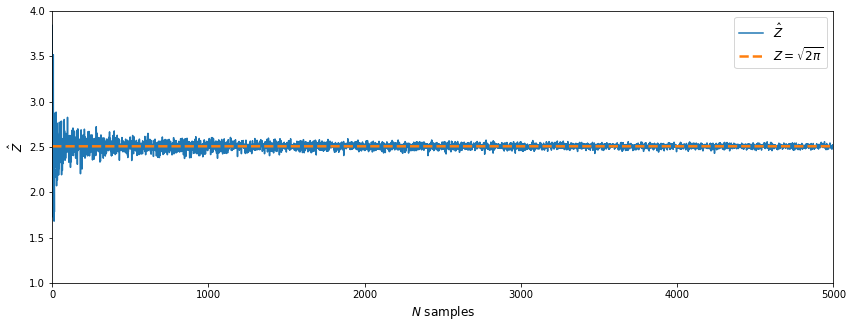

In [29]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(Z_hat, '-', label='$\hat{Z}$')
ax.plot(np.linspace(0, N, N+1), np.sqrt(2*np.pi)*np.ones(N+1), '--',
        label='$Z = \sqrt{2\pi}$', linewidth=2.5)
plt.xlim(0, N); plt.ylim(1.0, 4.0)
plt.xlabel('$N$ samples', fontsize=12); plt.ylabel('$\hat{Z}$', fontsize=12)
plt.legend(loc="upper right", fontsize=12)
plt.show()
fig.savefig("is_zhat1.png")

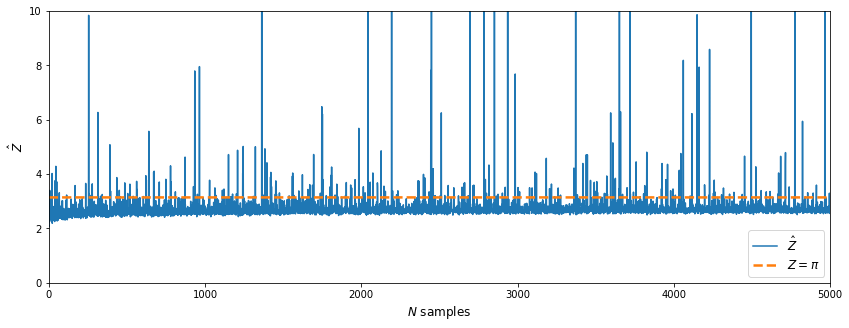

In [47]:
def importance_sampling(n, gamma=1.0):
    # Draw samples from standard Gaussian distribution
    xs = np.random.normal(loc=0.0, scale=1.0, size=n)
    # Compute density functions of unnormalized target and proposal
    w = (gamma / (gamma**2 + xs**2)) / norm.pdf(xs, loc=0.0, scale=1.0)
    return xs, w

N = 5000
Z_hat = np.zeros(N) # for storing estimates of normalizing constant
gamma = 1.0

for n in range(N):
    x, weights = importance_sampling(n+1, gamma)
    Z_hat[n] = np.mean(weights)
    
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(Z_hat, '-', label='$\hat{Z}$')
ax.plot(np.linspace(0, N, N+1), np.pi*np.ones(N+1), '--', 
        label='$Z = \pi$', linewidth=2.5)
plt.xlim(0, N); plt.ylim(0, 10);
plt.xlabel('$N$ samples', fontsize=12); plt.ylabel('$\hat{Z}$', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()
fig.savefig("is_zhat2.png")

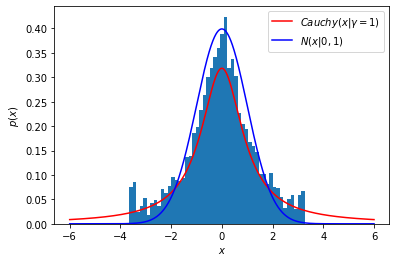

In [50]:
gamma = 1.0
#x, w = importance_sampling(n=5000, gamma=gamma)
fig = plt.figure()
plt.hist(x, bins=50, density=True, weights=weights)
array = np.linspace(-6., 6., 1000)
plt.plot(array, pdf_scaled_cauchy(array, gamma=gamma), 'r-', label="$Cauchy(x | \gamma = %d)$" % gamma)
plt.plot(array, norm.pdf(array), 'b-', label="$N(x | 0, 1)$")
plt.xlabel('$x$'); plt.ylabel('$p(x)$'); plt.legend()
plt.show()
fig.savefig("hist_cauchy.png")